<a href="https://colab.research.google.com/github/Aravind45code/Aravind45code/blob/main/Sigmoid_neuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

plotting sigmoid function

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from sklearn.metrics import mean_squared_error
from tqdm import tqdm_notebook

$S_{w,b}(x)=1/1+e^(-(wx+b))

In [ ]:
def sigmoid(x,w,b):
  return 1/(1+np.exp(-(w*x+b)))

In [ ]:
sigmoid(1,0.5,0)

0.6224593312018546

In [ ]:
w=0.9
b=0.1
X=np.linspace(-10,10,100)
Y=sigmoid(X,w,b)

In [ ]:
type(X)

numpy.ndarray

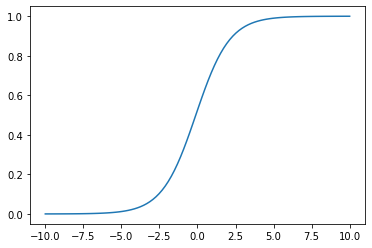

In [ ]:
plt.plot(X,Y)
plt.show()

In [ ]:
w=-1.4    #@param {type: "slider", min: -2, max: 2,step:0.1}
b=0.1
X=np.linspace(-10,10,100)
Y=sigmoid(X,w,b)

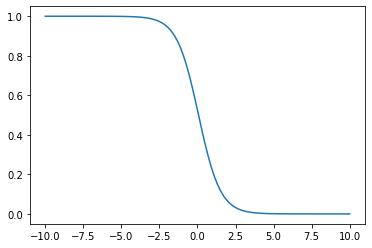

In [ ]:
plt.plot(X,Y)
plt.show()

w1,w2,x1,x2,b

In [ ]:
def sigmoid_2d(x1,x2,w1,w2,b):
  return 1/(1+np.exp(-(w1*x1+w2*x2+b)))


In [ ]:
sigmoid_2d(1,0,0.5,0,0)

0.6224593312018546

In [ ]:
from mpl_toolkits import mplot3d

In [ ]:
X1=np.linspace(-10,10,100)
X2=np.linspace(-10,10,100)
XX1,XX2=np.meshgrid(X1,X2)
print(XX1,XX2)

[[-10.         -9.7979798  -9.5959596 ...   9.5959596   9.7979798
   10.       ]
 [-10.         -9.7979798  -9.5959596 ...   9.5959596   9.7979798
   10.       ]
 [-10.         -9.7979798  -9.5959596 ...   9.5959596   9.7979798
   10.       ]
 ...
 [-10.         -9.7979798  -9.5959596 ...   9.5959596   9.7979798
   10.       ]
 [-10.         -9.7979798  -9.5959596 ...   9.5959596   9.7979798
   10.       ]
 [-10.         -9.7979798  -9.5959596 ...   9.5959596   9.7979798
   10.       ]] [[-10.        -10.        -10.        ... -10.        -10.
  -10.       ]
 [ -9.7979798  -9.7979798  -9.7979798 ...  -9.7979798  -9.7979798
   -9.7979798]
 [ -9.5959596  -9.5959596  -9.5959596 ...  -9.5959596  -9.5959596
   -9.5959596]
 ...
 [  9.5959596   9.5959596   9.5959596 ...   9.5959596   9.5959596
    9.5959596]
 [  9.7979798   9.7979798   9.7979798 ...   9.7979798   9.7979798
    9.7979798]
 [ 10.         10.         10.        ...  10.         10.
   10.       ]]


In [ ]:
print(X1.shape,X2.shape,XX1.shape,XX2.shape)
w1=0.5
w2=0.5
b=0


(100,) (100,) (100, 100) (100, 100)


In [ ]:
Y=sigmoid_2d(XX1,XX2,w1,w2,b)

In [ ]:
my_cmap=matplotlib.colors.LinearSegmentedColormap.from_list("",["red","yellow","green"])

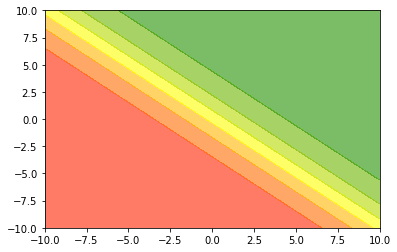

In [ ]:
plt.contourf(XX1,XX2,Y,cmap=my_cmap,alpha=0.6)
plt.show()

In [ ]:
Y=sigmoid_2d(XX1,XX2,w1,w2,b)

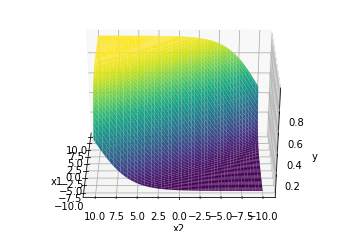

In [ ]:
fig=plt.figure()
ax=plt.axes(projection="3d")
ax.plot_surface(XX1,XX2,Y,cmap="viridis")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")
ax.view_init(30,180)



compute loss for a given dataset

In [ ]:
X=np.random.random(25)*20-10
w_unknown=0.5
b_unknown=0.25
Y=sigmoid(X,w_unknown,b_unknown)

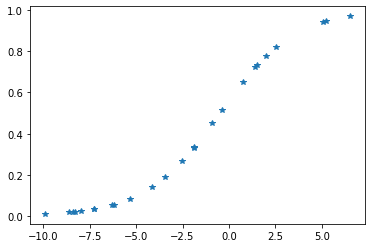

In [ ]:
plt.plot(X,Y,"*")
plt.show()

#compute loss for a given dataset

In [ ]:
X=np.random.random(25)*20-10
Y=sigmoid(X,w_unknown,b_unknown)

In [ ]:
def calculate_loss(X,Y,w_est,b_est):
  loss=0
  for x,y in zip(X,Y):
    loss+=(y-sigmoid(x,w_est,b_est))**2
  return loss

In [ ]:
W=np.linspace(0,2,100)
B=np.linspace(-1,1,100)
WW,BB=np.meshgrid(W,B)
Loss=np.zeros(WW.shape)


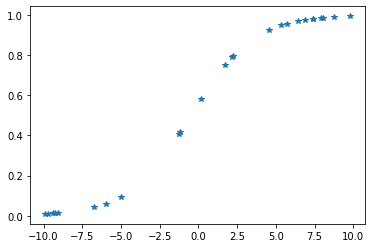

In [ ]:
plt.plot(X,Y,"*")
plt.show()

In [ ]:
WW.shape

(100, 100)

In [ ]:
for i in range(WW.shape[0]):
  for j in range(WW.shape[1]):
    Loss[i,j]=calculate_loss(X,Y,WW[i,j],BB[i,j])


Text(0.5, 0, 'loss')

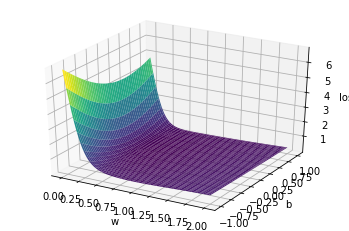

In [ ]:
fig=plt.figure()
ax=plt.axes(projection="3d")
ax.plot_surface(WW,BB,Loss,cmap="viridis")
ax.set_xlabel("w")
ax.set_ylabel("b")
ax.set_zlabel("loss")
#ax.view_init(30,180)



In [ ]:
ij=np.argmin(Loss)
i=int(np.floor(ij/Loss.shape[1]))
j=int(ij-i*Loss.shape[1])

In [ ]:
print(i,j,ij)

62 25 6225


In [ ]:
print(WW[i,j],BB[i,j])

0.5050505050505051 0.2525252525252526


list

#Class for sigmoid neuron

In [ ]:
class sigmoidneuron:

  def __int__(self):
    self.w=None
    self.b=None

  def perceptron(self,x):
     return  np.dot(x, self.w.T)+ self.b

  def sigmoid(self,x):

    return 1.0/(1.0+np.exp(-x))

  def grad_w(self,x,y):
    y_pred=self.sigmoid(self.perceptron(x))
    return (y_pred-y)*y_pred*(1-y_pred)*x

  def grad_b(self,x,y):
    y_pred=self.sigmoid(self.perceptron(x))
    return (y_pred-y)*y_pred*(1-y_pred)

  def fit(self,X,Y,epochs=1,learning_rate=1,initialise=False,display_loss=False):
    if initialise:
        self.w=np.random.randn(1,X.shape[1])
        self.b=0
    if display_loss:
      loss={}

    for i in tqdm_notebook([epochs],total=epochs,unit="epoch"):
      dw=0
      db=0
      for x,y in zip(X,Y):
        dw+=self.grad_w(x,y)
        db+=self.grad_b(x,y)
      self.w-=learning_rate*dw
      self.b-=learning_rate*db

      if display_loss:
        Y_pred=self.sigmoid(self.perceptron(X))
        loss[i]=mean_squared_error(Y_pred,Y).astype("int").ravel()
    if display_loss:
      plt.plot(list(loss.values()))
      plt.xlabel("epochs")
      plt.ylabel("mean squared error")
      plt.show()
  def predict(self,X):
    Y_pred=[]
    for x in X:
      y_pred=self.sigmoid(self.perceptron(x))
      Y_pred.append(y_pred)
    return np.array(Y_pred)




#fit for toy data

In [ ]:
X=np.asarray([[2.5,2.5],[4,-1],[1,-4],[-3,1.25],[-2,-4],[1,5]])
Y=[1,1,1,0,0,0]



In [ ]:
sn=sigmoidneuron()
sn.fit(X,Y,1,0.25,True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


In [ ]:
for  i in range(10):
  print(sn.w,sn.b)
  sn.fit(X,Y,1,0.25,False)

[[ 0.6713415 -0.8520627]] [0.02270875]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



[[ 0.80745864 -0.67634681]] [0.03663828]



[[ 0.93956498 -0.48228577]] [0.0252131]



[[ 1.02539351 -0.36565614]] [-0.00334128]



[[ 1.06555067 -0.35833478]] [-0.0335585]



[[ 1.09779604 -0.36748445]] [-0.06260322]



[[ 1.1280057  -0.37702937]] [-0.09013382]



[[ 1.15664326 -0.38615523]] [-0.11623795]



[[ 1.18387026 -0.3948445 ]] [-0.14101915]



[[ 1.20981059 -0.40312886]] [-0.16457439]


In [ ]:
def plot_sn(X,Y,sn,ax):
  X1=np.linspace(-10,10,100)
  X2=np.linspace(-10,10,100)
  XX1,XX2=np.meshgrid(X1,X2)
  YY=np.zeros(XX1.shape)
  for i in range(X2.size):
    for j in range(X1.size):
      val=np.array([X1[j],X2[i]])
      YY[i,j]=sn.sigmoid(sn.perceptron(val))
  ax.contourf(XX1,XX2,YY,cmap=my_cmap,alpha=0.6)
  ax.scatter(X[:,0],X[:,1],c=Y,cmap=my_cmap)
  ax.plot()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



[[ 1.12667168 -0.89517661]] [0.082333]



[[ 1.34866953 -0.54949634]] [0.05649104]



[[ 1.43956623 -0.43541352]] [-0.00105561]



[[ 1.45617001 -0.51966971]] [-0.05535764]



[[ 1.50581996 -0.49475872]] [-0.10180118]



[[ 1.53448053 -0.5211301 ]] [-0.1449579]



[[ 1.56797823 -0.52541307]] [-0.18399799]



[[ 1.59680448 -0.53637753]] [-0.22008152]



[[ 1.62446213 -0.54470446]] [-0.25339173]



[[ 1.65030539 -0.55295805]] [-0.28431669]



[[ 1.67469771 -0.56067106]] [-0.31312121]



[[ 1.69776592 -0.56797409]] [-0.34004319]



[[ 1.7196461  -0.57490006]] [-0.36528395]



[[ 1.74045268 -0.58148562]] [-0.38901662]



[[ 1.76028499 -0.58776212]] [-0.41139076]



[[ 1.77922958 -0.59375694]] [-0.43253614]



[[ 1.79736222 -0.59949411]] [-0.45256596]



[[ 1.81474959 -0.60499478]] [-0.47157941]



[[ 1.83145063 -0.61027769]] [-0.4896638]



[[ 1.84751767 -0.61535947]] [-0.50689627]


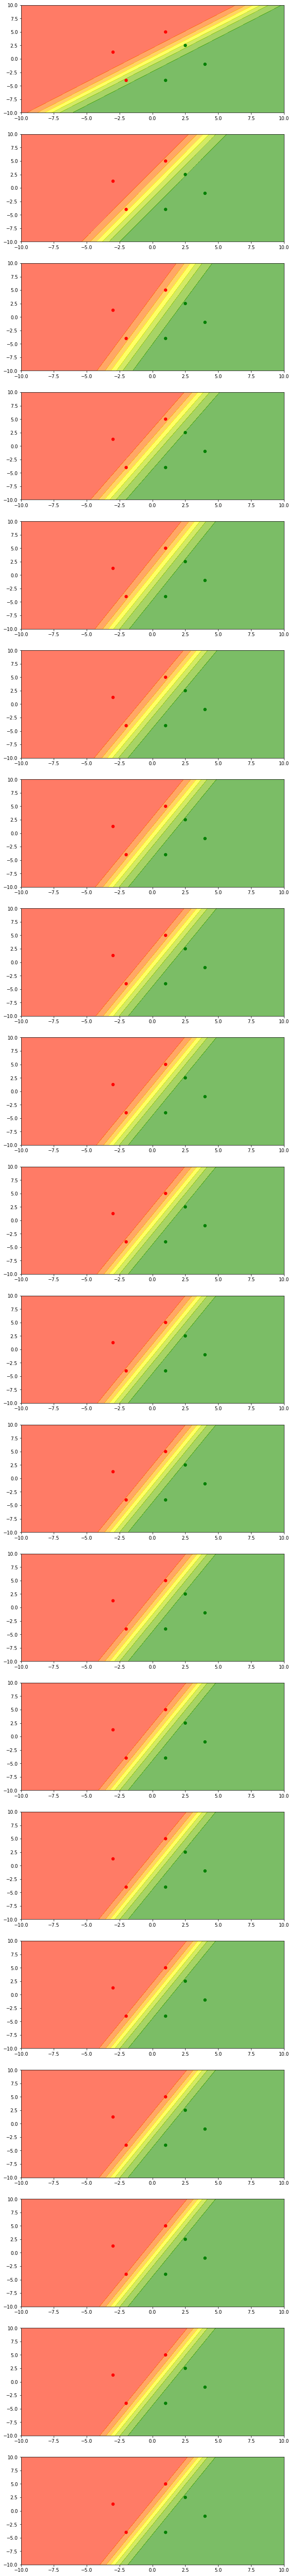

In [ ]:
N=20
plt.figure(figsize=(10,N*5))
sn.fit(X,Y,1,0.75,True)
for i in range(20):
  print(sn.w,sn.b)
  ax=plt.subplot(N,1,i+1)
  plot_sn(X,Y,sn,ax)
  sn.fit(X,Y,1,0.5,False)

#practical example
loading  data

In [ ]:
!wget https://www.dropbox.com/s/739uo8ebwbic9kb/mobile_cleaned.csv

In [ ]:
!ls

mobile_cleaned.csv  sample_data


In [ ]:
data=pd.read_csv("mobile_cleaned.csv")


In [ ]:
data.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,Resolution,SIM 2_2G,SIM 2_3G,SIM 2_4G,SIM 2_Other,Num_cores_312,Num_cores_Deca,Num_cores_Dual,Num_cores_Hexa,Num_cores_Octa,Num_cores_Other,Num_cores_Quad,Num_cores_Tru-Octa,Brand_10.or,Brand_Apple,Brand_Asus,Brand_Billion,Brand_Blackberry,Brand_Comio,Brand_Coolpad,Brand_Do,Brand_Gionee,Brand_Google,Brand_HTC,Brand_Honor,Brand_Huawei,Brand_InFocus,Brand_Infinix,Brand_Intex,Brand_Itel,...,Brand_Meizu,Brand_Micromax,Brand_Mobiistar,Brand_Moto,Brand_Motorola,Brand_Nokia,Brand_Nubia,Brand_OPPO,Brand_OnePlus,Brand_Oppo,Brand_Panasonic,Brand_Razer,Brand_Realme,Brand_Reliance,Brand_Samsung,Brand_Sony,Brand_Spice,Brand_Tecno,Brand_Ulefone,Brand_VOTO,Brand_Vivo,Brand_Xiaomi,Brand_Xiaomi Poco,Brand_Yu,Brand_iVooMi,os_name_Android,os_name_Blackberry,os_name_KAI,os_name_Nokia,os_name_Other,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,Rating
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,20,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.5
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,8,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.5
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,25,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.4
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,24,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,4.3
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,16,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.4


In [ ]:
data.shape

(341, 88)

In [ ]:
X=data.drop("Rating",axis=1)

In [ ]:
Y=data["Rating"].values

In [ ]:
X.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,Resolution,SIM 2_2G,SIM 2_3G,SIM 2_4G,SIM 2_Other,Num_cores_312,Num_cores_Deca,Num_cores_Dual,Num_cores_Hexa,Num_cores_Octa,Num_cores_Other,Num_cores_Quad,Num_cores_Tru-Octa,Brand_10.or,Brand_Apple,Brand_Asus,Brand_Billion,Brand_Blackberry,Brand_Comio,Brand_Coolpad,Brand_Do,Brand_Gionee,Brand_Google,Brand_HTC,Brand_Honor,Brand_Huawei,Brand_InFocus,Brand_Infinix,Brand_Intex,Brand_Itel,...,Brand_Lyf,Brand_Meizu,Brand_Micromax,Brand_Mobiistar,Brand_Moto,Brand_Motorola,Brand_Nokia,Brand_Nubia,Brand_OPPO,Brand_OnePlus,Brand_Oppo,Brand_Panasonic,Brand_Razer,Brand_Realme,Brand_Reliance,Brand_Samsung,Brand_Sony,Brand_Spice,Brand_Tecno,Brand_Ulefone,Brand_VOTO,Brand_Vivo,Brand_Xiaomi,Brand_Xiaomi Poco,Brand_Yu,Brand_iVooMi,os_name_Android,os_name_Blackberry,os_name_KAI,os_name_Nokia,os_name_Other,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,20,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,8,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,25,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,24,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,16,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1


In [ ]:
Y

array([4.5, 4.5, 4.4, 4.3, 4.4, 4.5, 4.3, 4.1, 4.3, 4.5, 4.5, 4. , 4.4,
       4.4, 4.4, 4.4, 4.5, 4.4, 4.4, 4.4, 4.4, 4.5, 4.4, 4.3, 4.2, 4.3,
       4.3, 4.6, 4.4, 4.5, 3.9, 4.2, 4.3, 4.2, 4.3, 4.3, 4.2, 4.4, 4.1,
       3.8, 4.4, 4.6, 4.3, 4.5, 4.5, 4.2, 3.9, 4.3, 4. , 4.3, 4.3, 3.9,
       4.2, 4.5, 4. , 4.6, 4.2, 2.8, 4.4, 4.3, 4.2, 4.4, 4.4, 4. , 4.4,
       4.4, 4.1, 4.5, 4.3, 3.9, 4.3, 4.1, 4.1, 4.2, 3.4, 4.2, 4.6, 3.8,
       4.3, 4.5, 4.2, 4.5, 4.5, 4. , 4.1, 4.4, 4.5, 4.1, 4.5, 4.3, 4.5,
       3.9, 3.9, 4.4, 4.4, 4.4, 4. , 4.1, 4.1, 4.4, 4.3, 4.3, 4.2, 4.3,
       3.4, 4.3, 4.3, 4.2, 4.6, 4.8, 4.4, 3.4, 3.7, 4.2, 4.3, 4.4, 4.3,
       4.2, 4.1, 4.3, 4. , 3.9, 4.4, 4.4, 3.9, 3.1, 3.7, 4.2, 4.4, 4. ,
       4. , 4.1, 4.2, 4.3, 4.2, 4.3, 4.1, 3.6, 4.1, 4. , 3.8, 3.7, 4.3,
       4.1, 4.1, 4.5, 4. , 4.3, 3.6, 4.1, 4.5, 3.5, 4. , 4.3, 4.6, 3.5,
       3.9, 4.1, 3.9, 3.8, 4.4, 4.3, 4. , 3.9, 4.4, 4.7, 3.9, 4.5, 3.7,
       4. , 4.3, 4.1, 4.8, 4.1, 4. , 4.7, 4. , 4.1, 4. , 3.4, 4.

In [ ]:
threshold=4.2
data["Class"]=(data["Rating"]>=threshold).astype(np.int)


In [ ]:
data["Class"]

0      1
1      1
2      1
3      1
4      1
      ..
336    0
337    0
338    0
339    0
340    1
Name: Class, Length: 341, dtype: int64

In [ ]:
data["Class"].value_counts(normalize=True)

0    0.533724
1    0.466276
Name: Class, dtype: float64

In [ ]:
Y_binarised=data["Class"].values

#standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
R=np.random.random([100,1])

In [ ]:
R

array([[0.26246417],
       [0.210029  ],
       [0.80434027],
       [0.45004478],
       [0.42139674],
       [0.32087878],
       [0.45180672],
       [0.1415693 ],
       [0.75155924],
       [0.10527357],
       [0.10052483],
       [0.66712129],
       [0.2293873 ],
       [0.2317839 ],
       [0.24414177],
       [0.13823415],
       [0.92259314],
       [0.35689397],
       [0.75482679],
       [0.66876064],
       [0.3370226 ],
       [0.44407732],
       [0.41710736],
       [0.06344208],
       [0.46082897],
       [0.39845254],
       [0.90943436],
       [0.53722247],
       [0.45243084],
       [0.49665932],
       [0.80758388],
       [0.32553616],
       [0.79164456],
       [0.4566189 ],
       [0.35098024],
       [0.56783629],
       [0.88208337],
       [0.679794  ],
       [0.20749868],
       [0.95321631],
       [0.00159839],
       [0.84239013],
       [0.18750134],
       [0.04911152],
       [0.23420575],
       [0.21113479],
       [0.35189918],
       [0.586

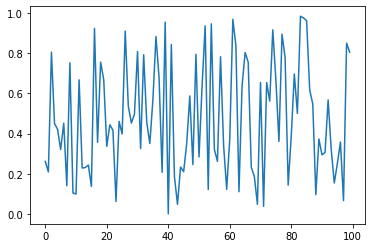

In [ ]:
plt.plot(R)
plt.show()

In [ ]:
np.mean(R)

0.47766800041070107

In [ ]:
np.std(R)

0.2821981917519776

In [ ]:
scaler=StandardScaler()


In [ ]:
scaler.fit(R)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
scaler.mean_

array([0.477668])

In [ ]:
RT=scaler.transform(R)

In [ ]:


np.mean(RT)

-2.4424906541753444e-17

In [ ]:
np.std(RT)

1.0

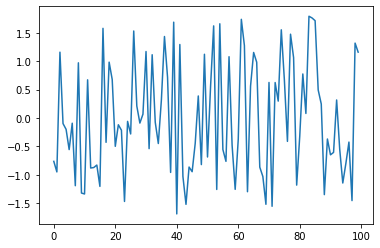

In [ ]:
plt.plot(RT)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0,stratify=Y_binarised)

In [ ]:
print(X_train.shape,X_test.shape)

(255, 87) (86, 87)


In [ ]:
scaler=StandardScaler()


here for train and test data ,we standardise in such a way that we first fit and transform on train data and take that mean and std and transform test data

In [ ]:
X_scaled_train=scaler.fit_transform(X_train)
X_scaled_test=scaler.transform(X_test)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
min_max_scaler=MinMaxScaler()

minmaxscaler and standard scaler both are differnt as standard scaler only sets mean to 0 and std to 1 where as minmax sets all the values between two desired values

In [ ]:

Y_scaled_train=min_max_scaler.fit_transform(Y_train.reshape(-1,1))

In [ ]:
np.max(Y_scaled_train)

1.0

In [ ]:
Y_scaled_test=min_max_scaler.transform(Y_test.reshape(-1,1))

In [ ]:
scaled_threshold=min_max_scaler.transform(np.array([threshold]).reshape(1,-1))[0][0]

In [ ]:
scaled_threshold

0.6800000000000002

In [ ]:
Y_binarised_train=(Y_scaled_train>scaled_threshold).astype("int").ravel()

In [ ]:
Y_binarised_train

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1])

In [ ]:
Y_binarised_test=(Y_scaled_test>scaled_threshold).astype("int").ravel()

In [ ]:
Y_binarised_test

array([0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0])

#Train on real data

In [ ]:
sn=sigmoidneuron()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


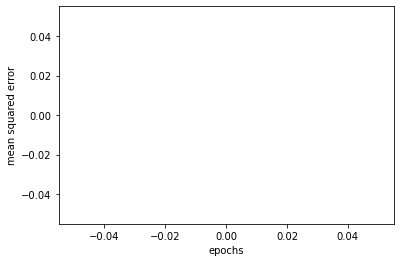

In [ ]:
sn.fit(X_scaled_train,Y_scaled_train,epochs=1000,learning_rate=0.2,initialise=True,display_loss=True)

In [ ]:
Y_pred_train=sn.predict(X_scaled_train)
Y_pred_test=sn.predict(X_scaled_test)

In [ ]:
Y_pred_binarised_train=(Y_pred_train>scaled_threshold).astype("int").ravel()
Y_pred_binarised_test=(Y_pred_test>scaled_threshold).astype("int").ravel()

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_train=accuracy_score(Y_pred_binarised_train,Y_binarised_train)
accuracy_test=accuracy_score(Y_pred_binarised_test,Y_binarised_test)

In [ ]:
print(accuracy_train,accuracy_test)

0.6901960784313725 0.6162790697674418
